# Linear regression

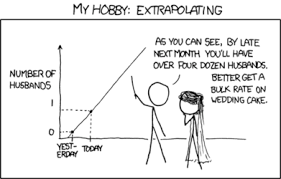


In [1]:
# %%capture
# !pip install statsmodels
# !pip install sklearn

In [22]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

# Modeling libraries
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

import pandas as pd
np.random.seed(123)

# Table of Contents

## Simple linear regression

Simple linear regression an statistical model that assumes a linear relationship between one predictor and one target variable. Mathematically, this can be expressed as:

 $$ Y = \beta_0 +  \beta_1 X + \epsilon$$

Where:
 * $X$ = predictor variable
 * $Y$ = target variable
 * $\beta_0$ = intercept
 * $\beta_1$ = slope
 * $\epsilon$ = noise (Gaussian)


The above equation is known as the *population regression line*.

In [3]:
# From the example in the previous class


Of course, in the real life we don´t know the true parameters of the model, neither if the model is real!!! Today we´ll learn a [valuable lesson](https://en.wikipedia.org/wiki/All_models_are_wrong):



<center> <b>"All models are wrong, but some are useful"</b> </center>


In practice what we do is, after seing an scatter plot as the one above, try to infer the parameters of the model $\beta_0$ and the slope, $\beta_1$.  Once they are estimated, the estimated fit becomes $$ \hat{Y} = \hat{\beta_0} +  \hat{\beta_1} X$$

In [131]:
# plot the linear fit on top of the scatter


The numeric difference between the *least squares regression line* and the true value is called the *residual*, and represents the error in the estimate: $e = y_i  - \hat{y}$. The regression line minimized the *Residual Sum of Squares* (RSS): $$RSS = e_1^2 + e_2^2 + \dots + e_n ^2$$



### How good are our estimates?

The theory stablishes that the coefficients we find via the least squares method are **unbiased**, that is, the don´t systematically over or underestimate the true values.

There are also formulas to estimate the **Standard Error** of the estimates $SE(\hat{\beta_0})$ and $SE(\hat{\beta_1})$, from which we can obtain the $95%$ confidence intervals as:


$$\hat\beta \pm 2*SE(\hat{\beta})$$



In [7]:
# Compute confidence intervals with the resampling technique (will check results later)


### Can we safely conclude that there is a true relationship between X and y?


If the standard error is large and the estimated value small we can not be sure that its true value is really different from zero --- i.e. not statistically significant. Luckily for us we know about Hypothesis testing!!


* Null hypothesis $H_0: \beta_1 = 0 $
* Alternative hypothesis $H_a: \beta_1 \ne 0$

To test this we compute a *t-statistic* which measures the how many standard errors our parameter is away from 0:

$$t=\frac{\hat{\beta_1}}{SE(\hat{\beta_1})}$$


Statisticians have worked out what the distribution of this statistic is under the null hypothesys --- a t-distrubution, not very imaginative. Knowing this distribution we ca determine the probability our results are due to chance. You alredy know that, we can calcualte the **p-value**.

**CAUTION!** here is another [video](https://www.youtube.com/watch?v=0Rnq1NpHdmw) to remind you the dangers of the p-values: 

In [8]:
# Based on the distributions found with resampling --> p-value

### How good is our model?
No matter how significant our parameters are... if the model is terrible! 


If just use the mean as the predicted value for each predicion, the error we would make is (*total sum of squares*):

$$TTS=\Sigma(y_i - \bar{y}_i)^2$$

We will consider this our baseline.

In [132]:
# show mean prediction


In [10]:
# Calculate TSS for the above model

Recall that the coeficients of the linear regression minimize the $RSS=\Sigma(y_i - \hat{y_i})^2$, that is, the amount of variability that is left unexplained after performing the regression. The [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination):

$$R^2 = \frac{TSS -RSS}{TSS} = 1- \frac{RSS}{TSS}$$

measures the "*proportion of variability in Y that can be explained using X*". It is a measure of the linear relationship that exists between $X$ and $y$.

**Note:** in the case of simple linear regression, the $R^2$ coefficient is just the squeared of the *Pearson´s* correlation coefficient we already know. 

In [11]:
# Calculate the R^2 of the above model

### Linear regression with statsmodels

To analyse linear models, we will be using the [statsmodels library](http://statsmodels.sourceforge.net/) which gives us a lot information  in a simple summary, and integrates nicely with pandas.

## Multiple linear regression

Of course, the hours one studies is not the only important factor to get good grades. We can think of IQ, for example, as another determining factor. In fact, we can generalize a linear model to have as many variables as we want:

 $$ Y = \beta_0 +  \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_2 X_m  \epsilon$$


In [133]:
# From the example in the previous class


The coefficients of the multiple linear regression are computed similar to the simple linear regression case: they minimize:

$$RSS = \Sigma(y_i - \hat{y_i})^2$$


where:

 $$ \hat{y} = \hat{\beta_0} +  \hat{\beta_1 X_1} + \hat{\beta_2} X_2 + \dots + \hat{\beta_2} X_m$$


The null hypothesis expands here to say that all coefficients are equal to 0. The alternative is only that at least one of them is significant. An F test is performed to test for significance.
$$ F = \frac{(SST - SSE)/p}{SSE / (n - p - 1)}$$

# References: 

* [Introduction to Statistical Learning (Chapter 3)](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf)